# Examples of LNM

In [1]:
from ipynb.fs.full.koselleck import *

[Koselleck] (10:01:52) Alles bereit 


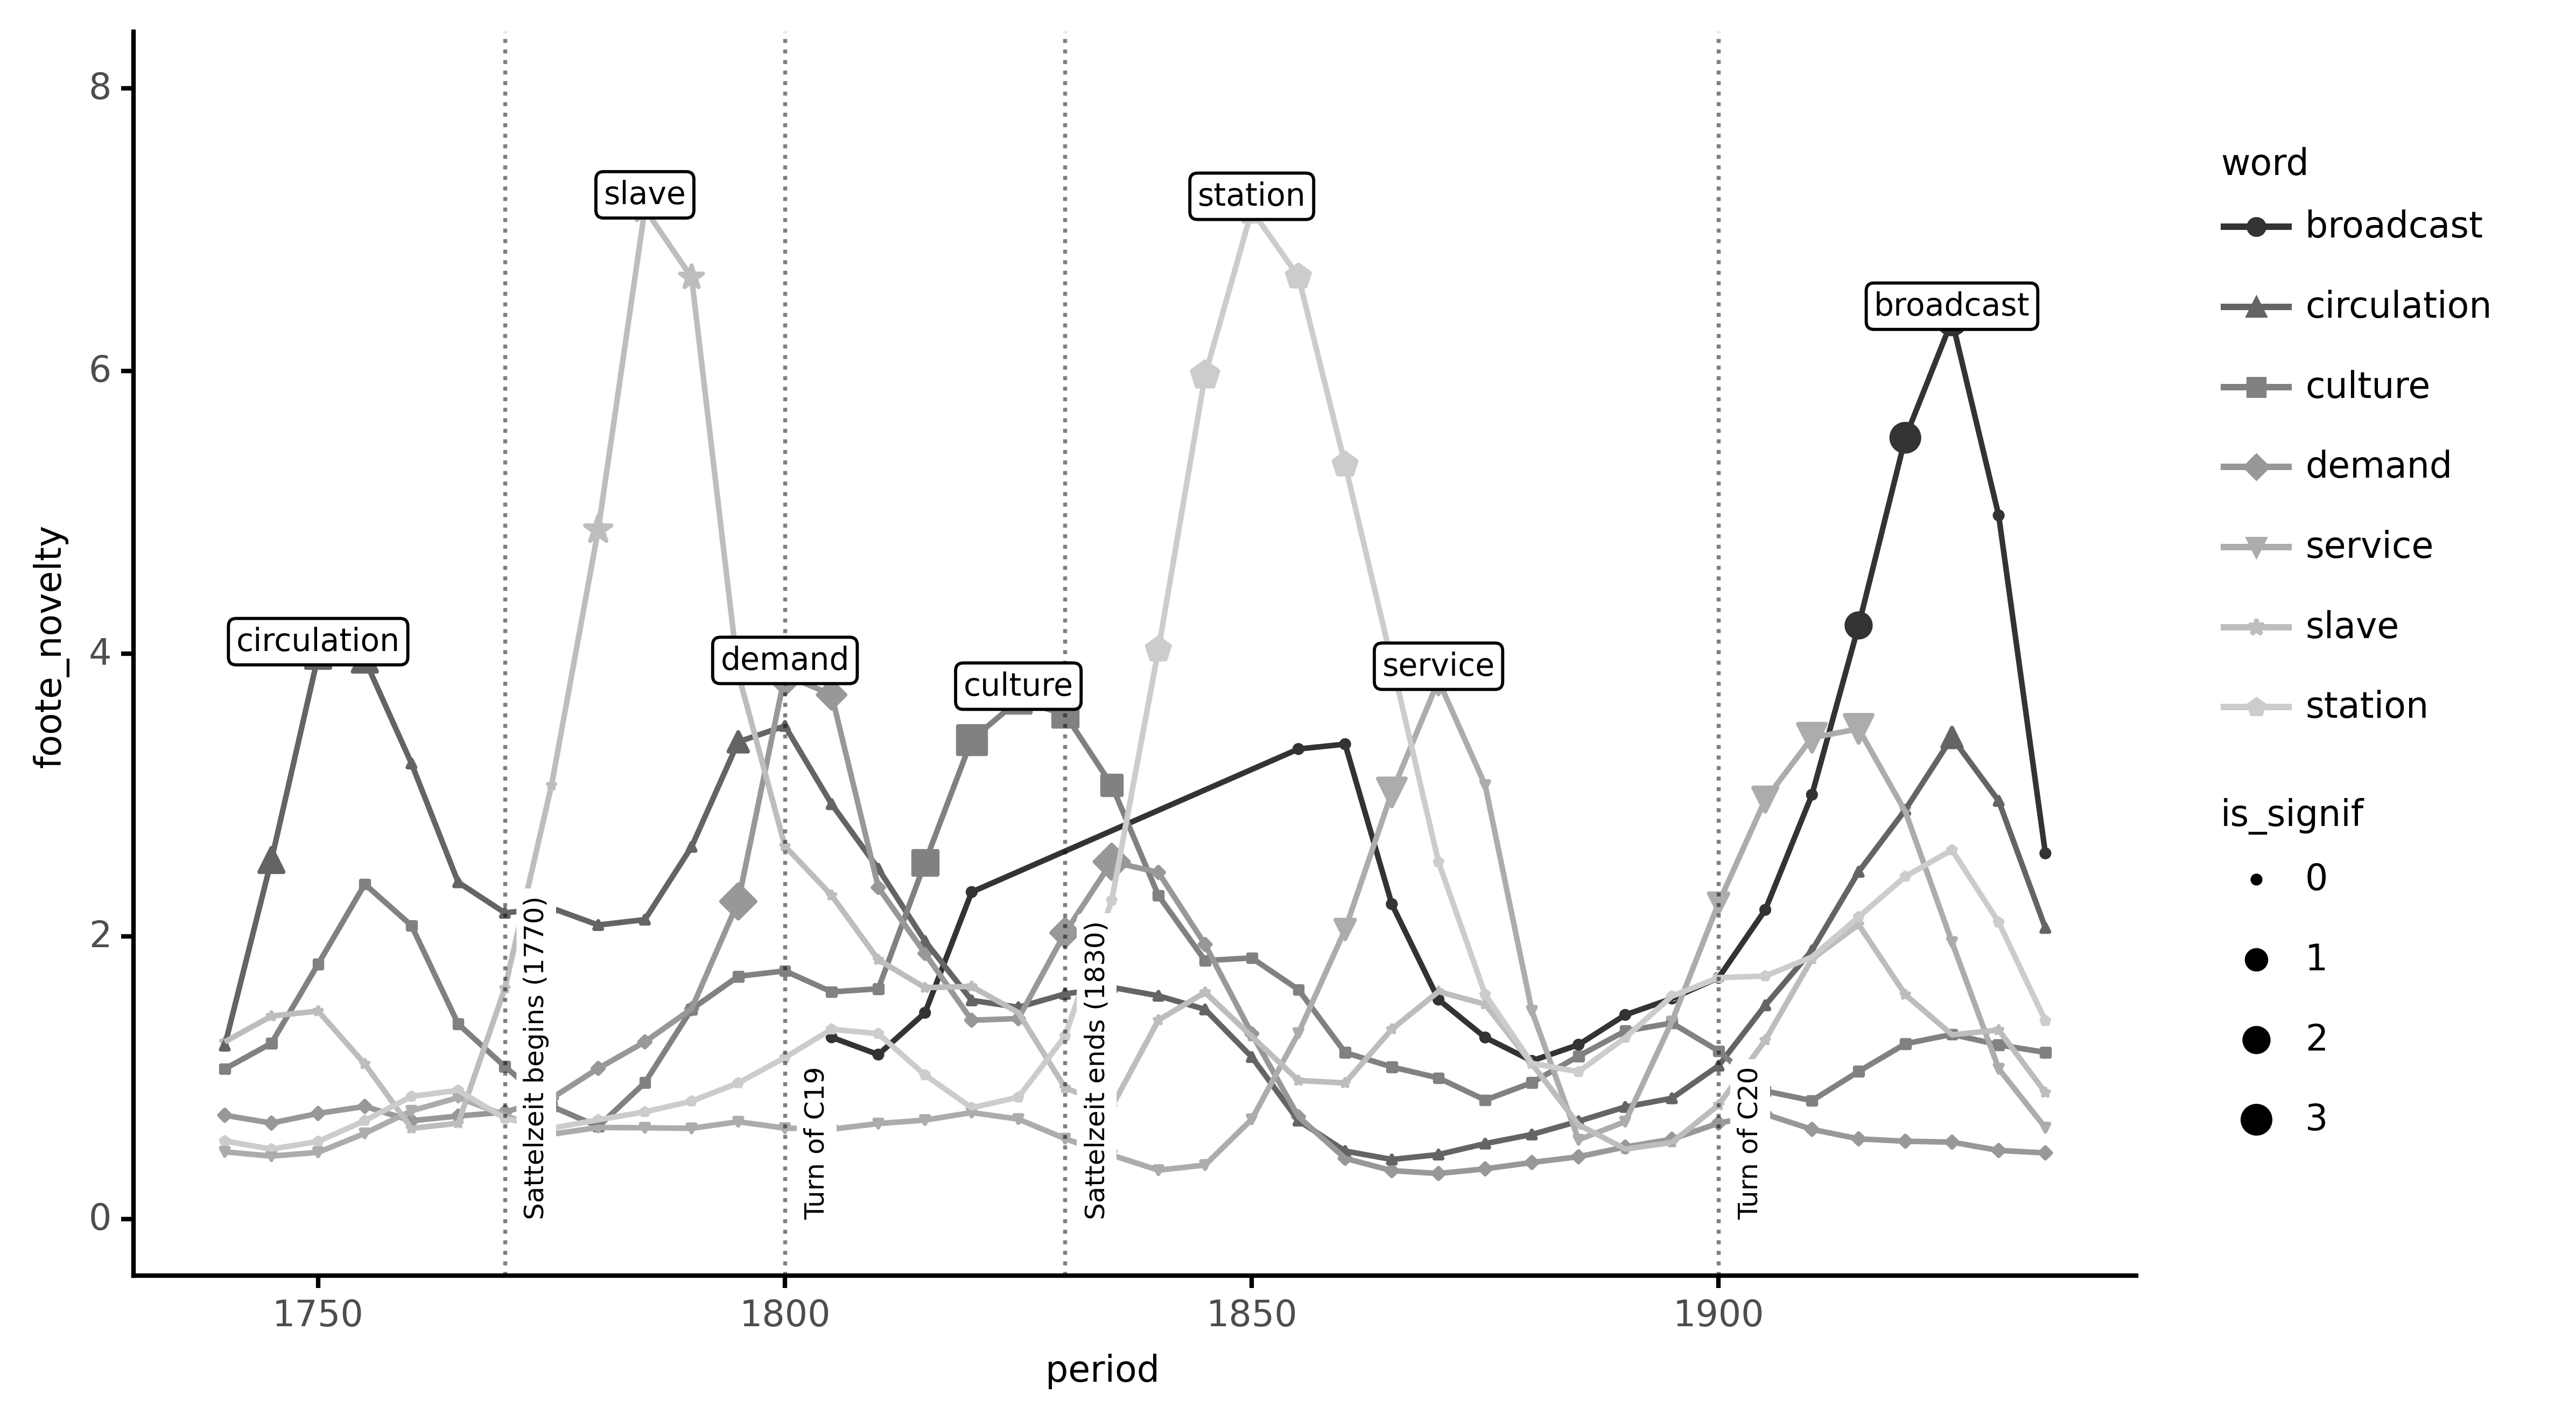

<ggplot: (8781873379151)>

In [4]:
plot_nov_word('''
circulation
slave
demand
service
broadcast
station
culture
''',min_foote_size=4,max_foote_size=6)

[Koselleck] (10:00:58) Number of unique neighbors: 24 (+68.3s)


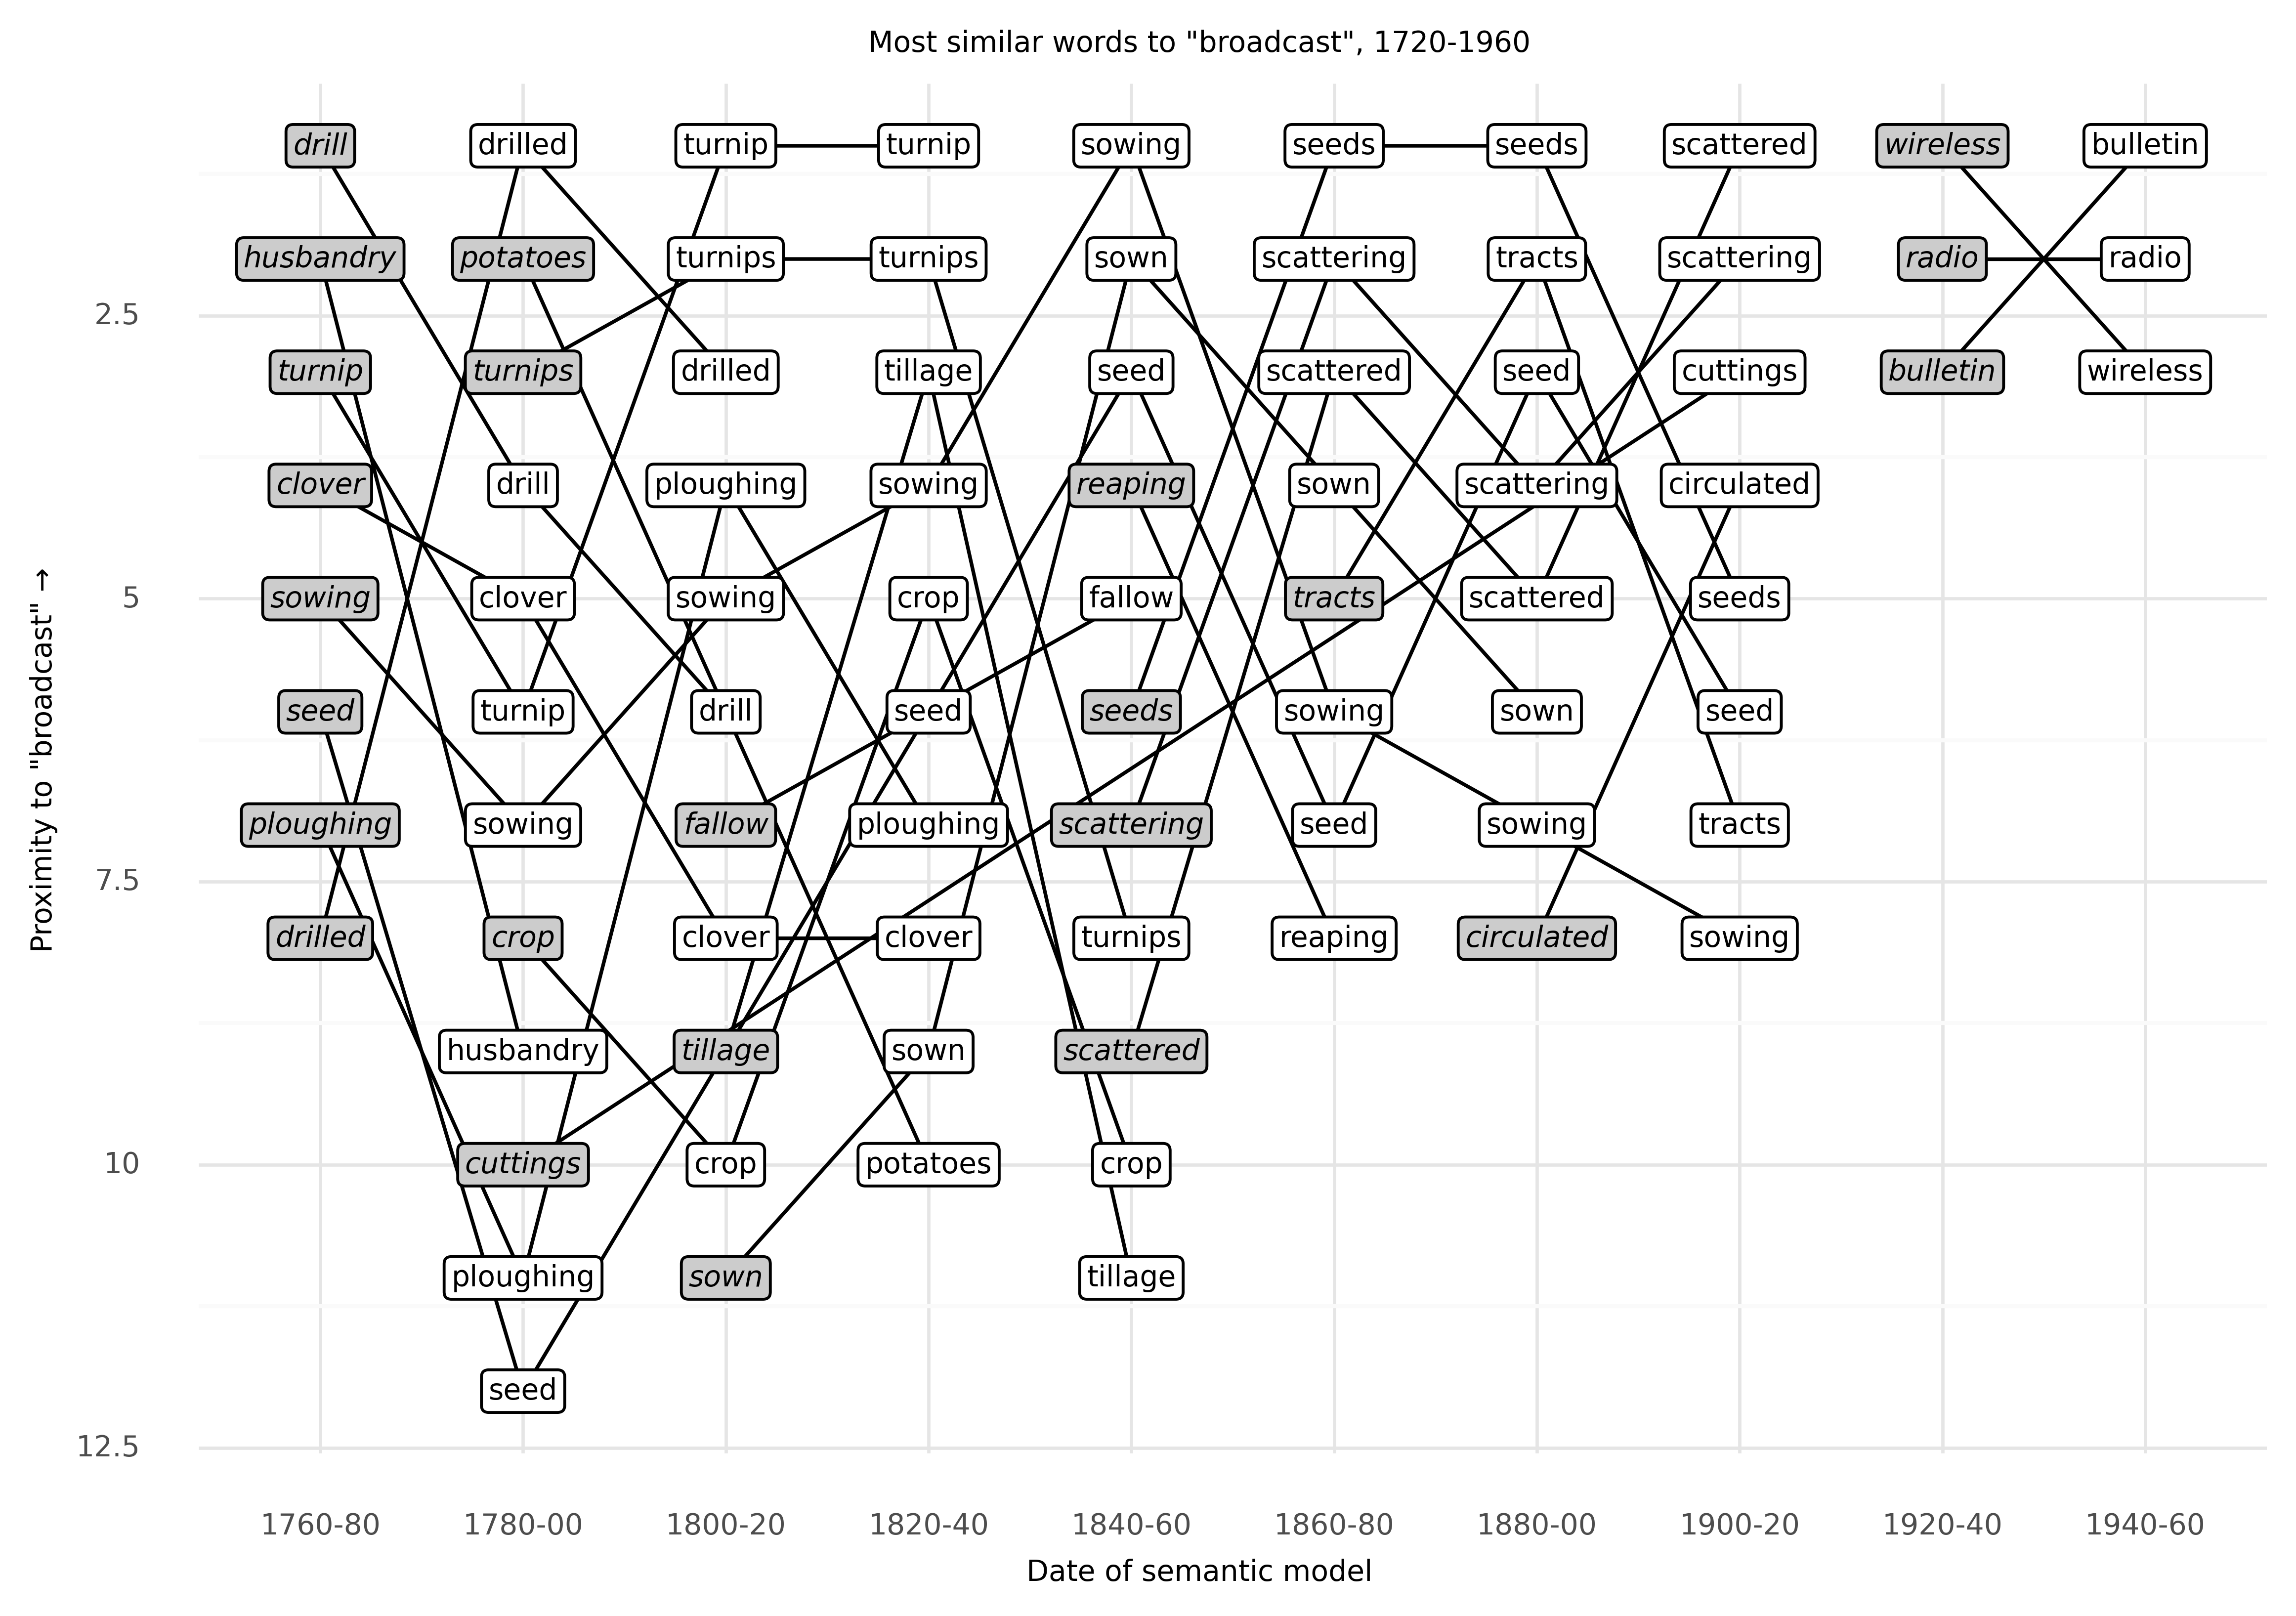

<ggplot: (8788289192831)>

In [42]:
plot_nbrs('broadcast')

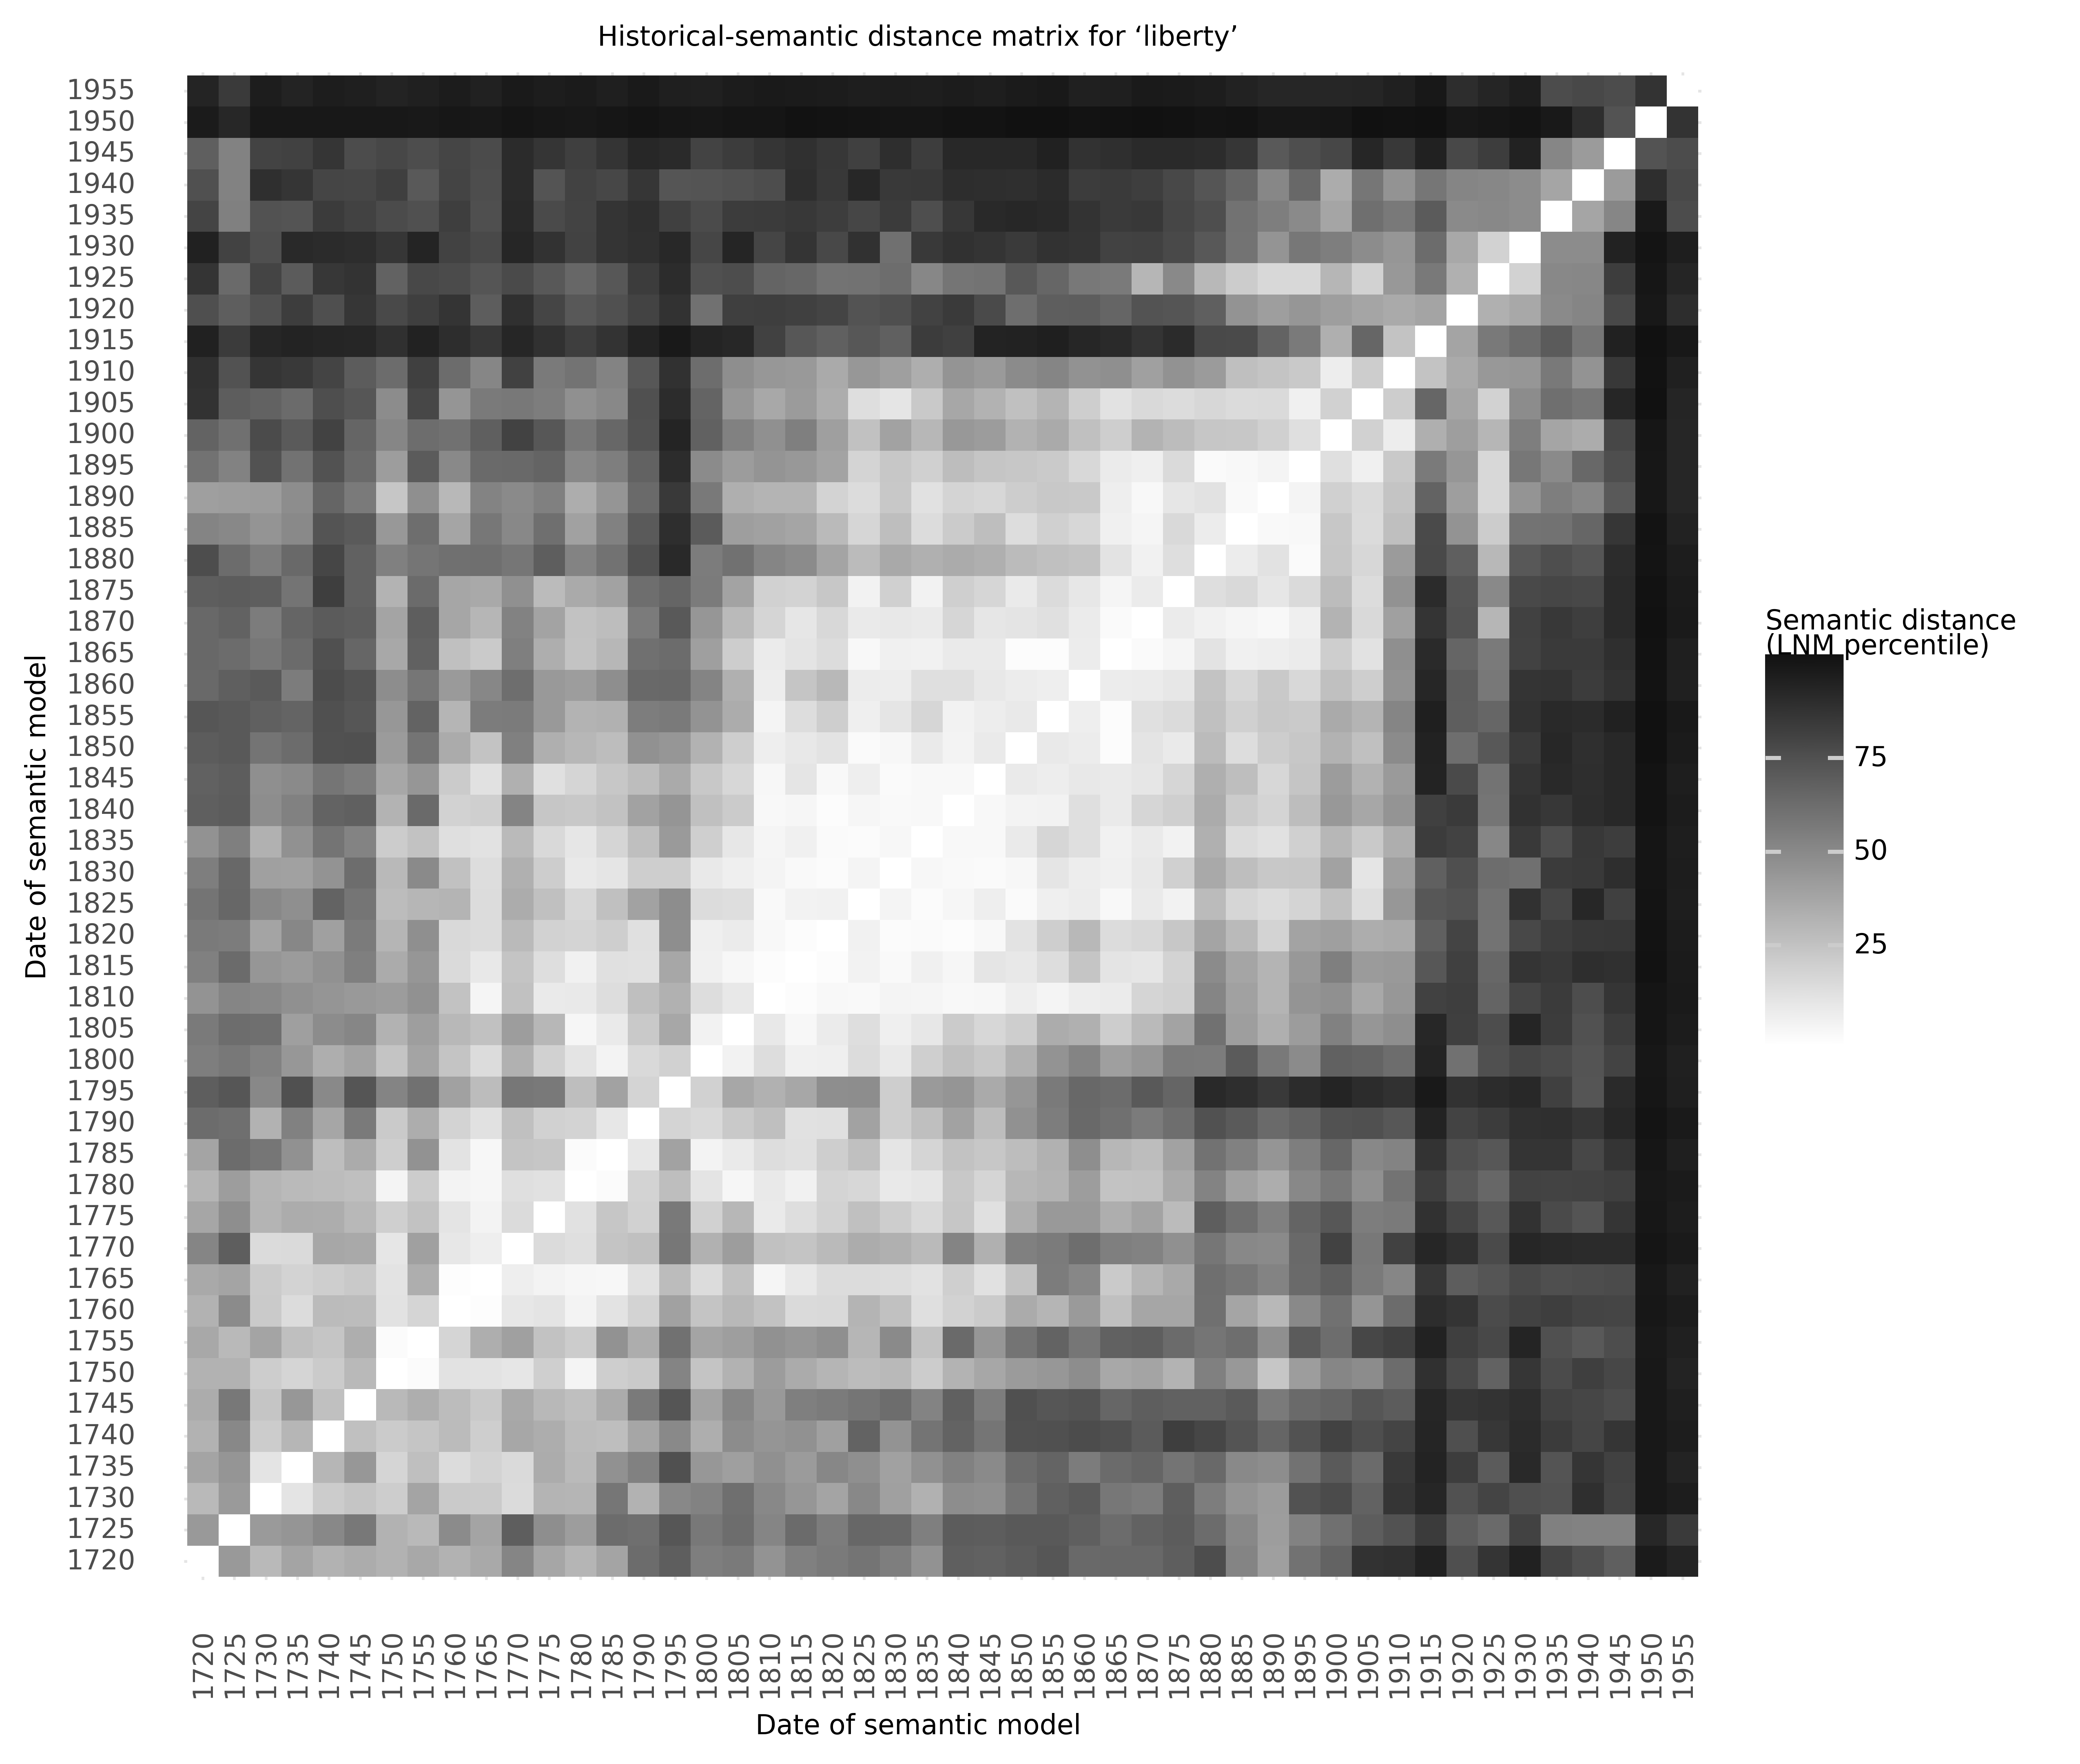

<ggplot: (8788366666129)>

In [31]:
plot_historical_semantic_distance_matrix('liberty')

[Koselleck] (08:51:24) Number of unique neighbors: 12 (+2605.7s)


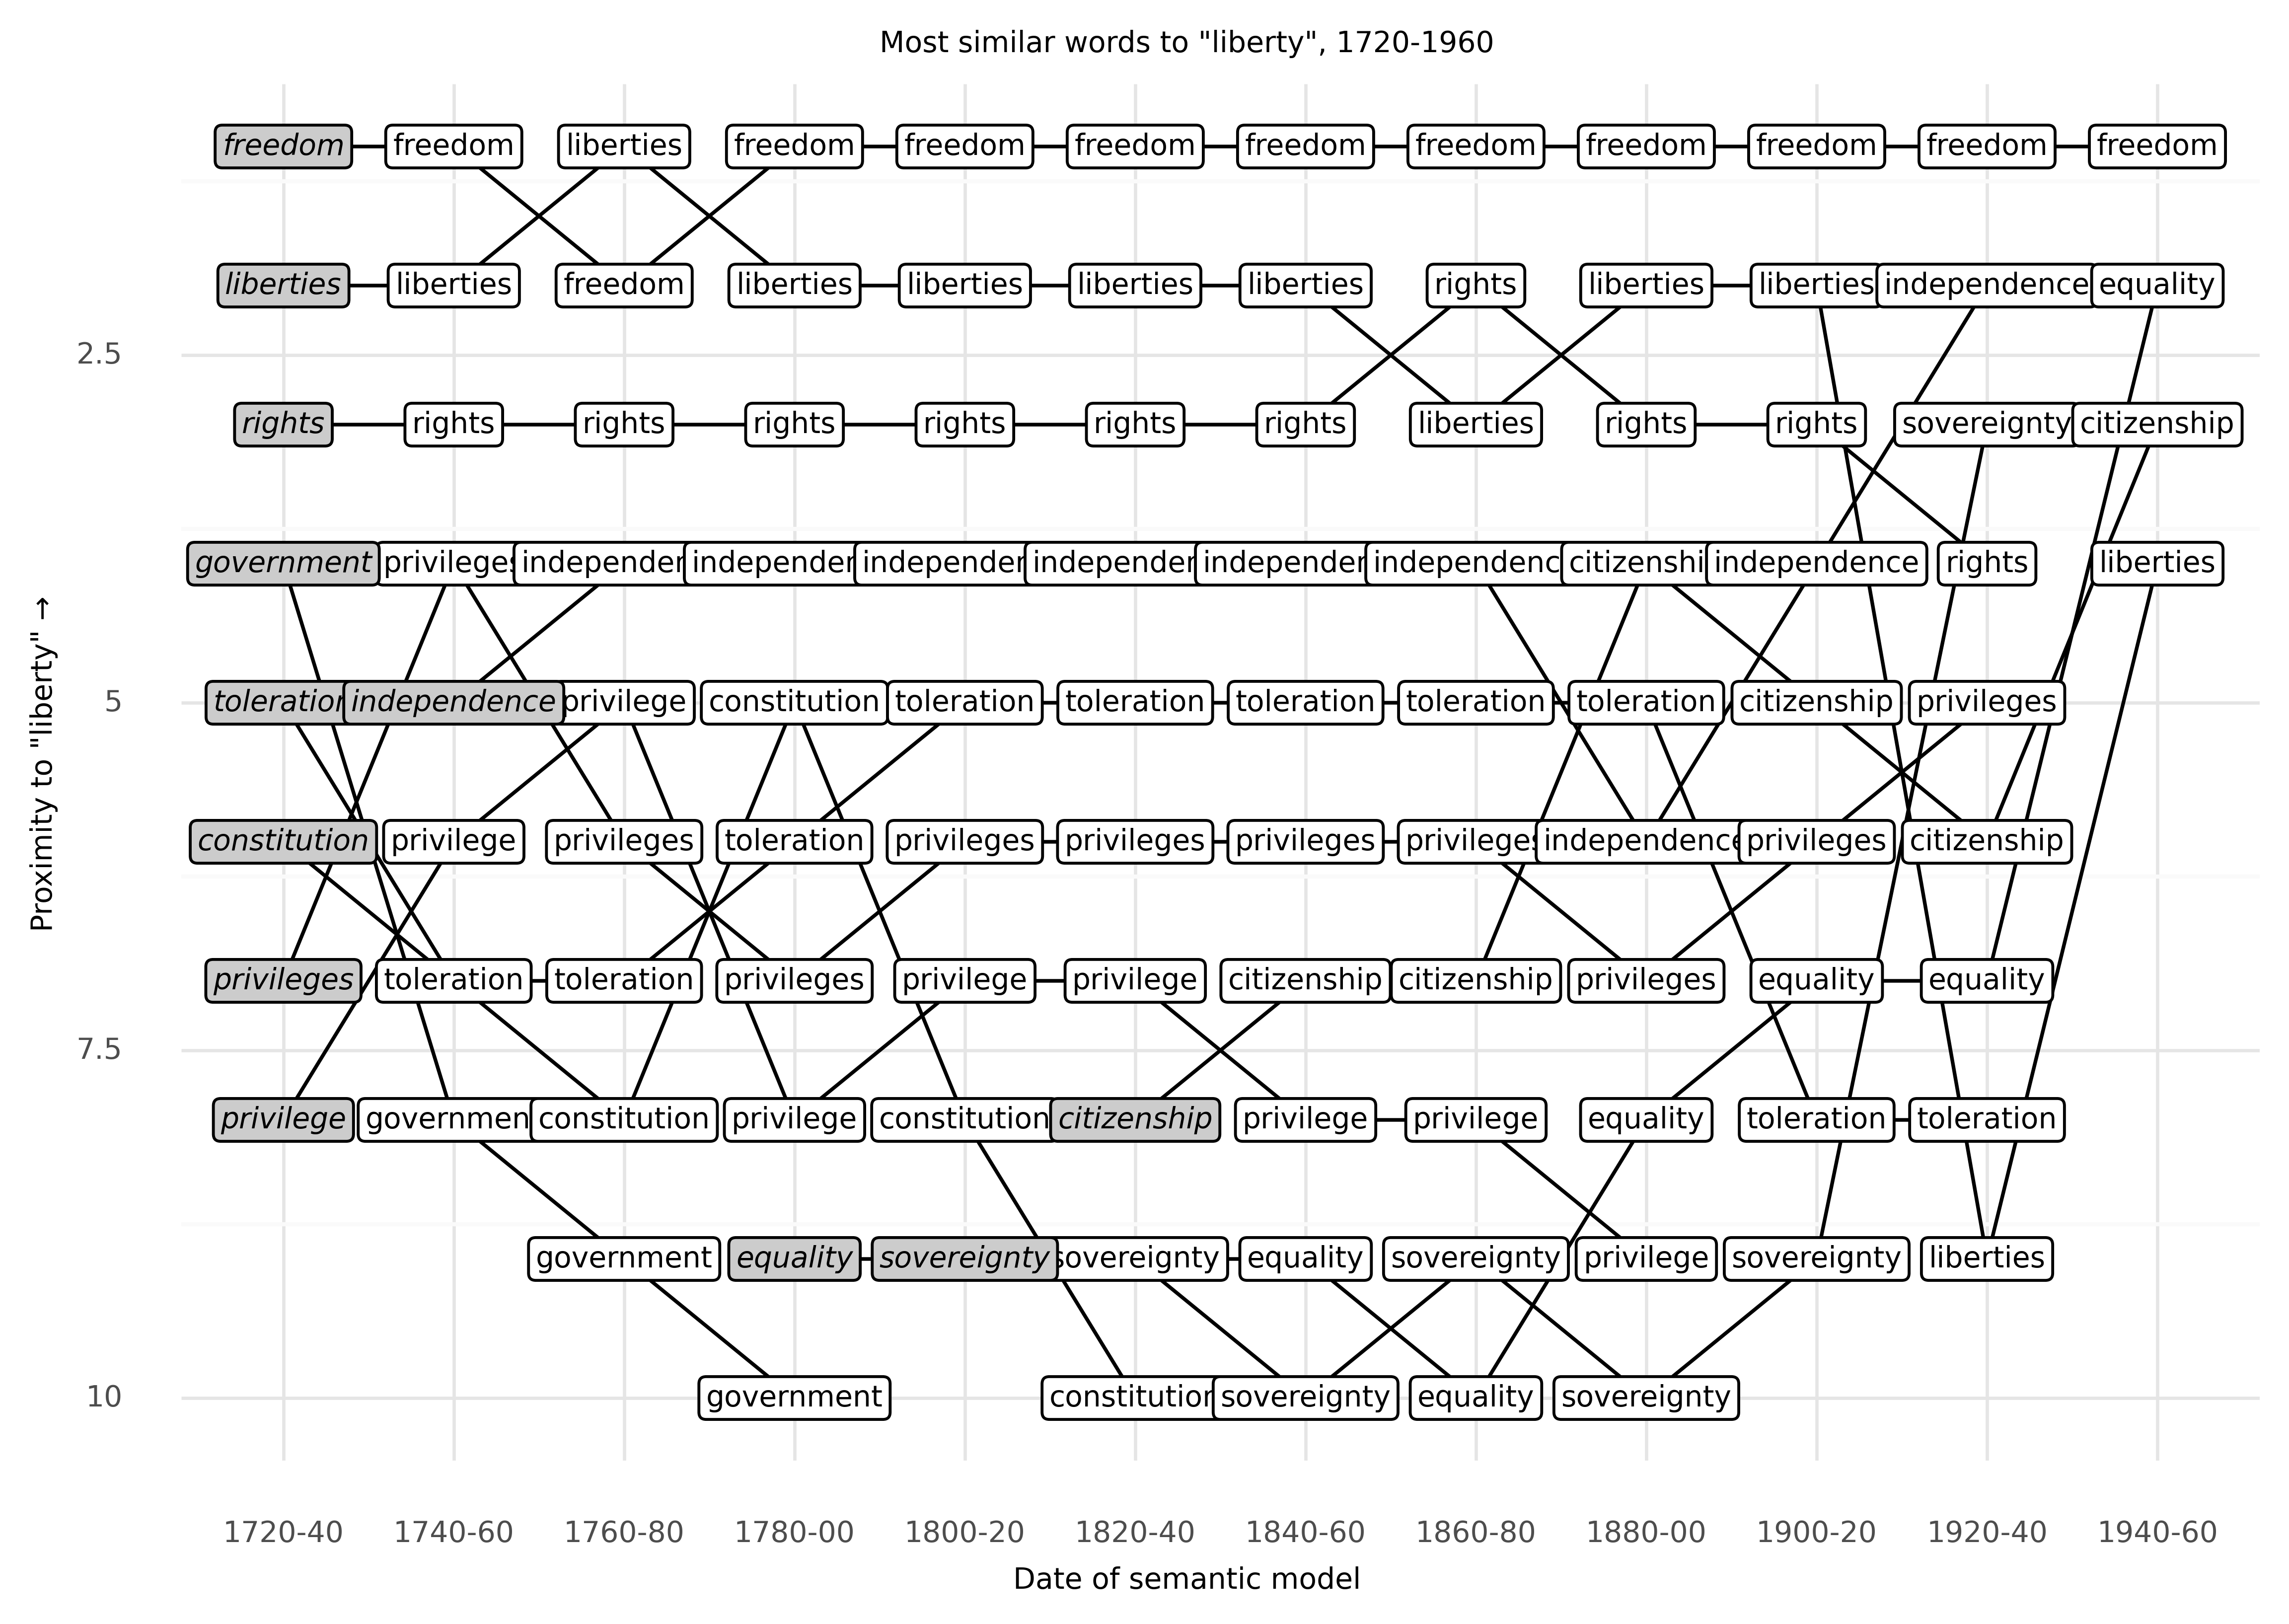

<ggplot: (8788364434312)>

In [29]:
plot_nbrs('liberty')

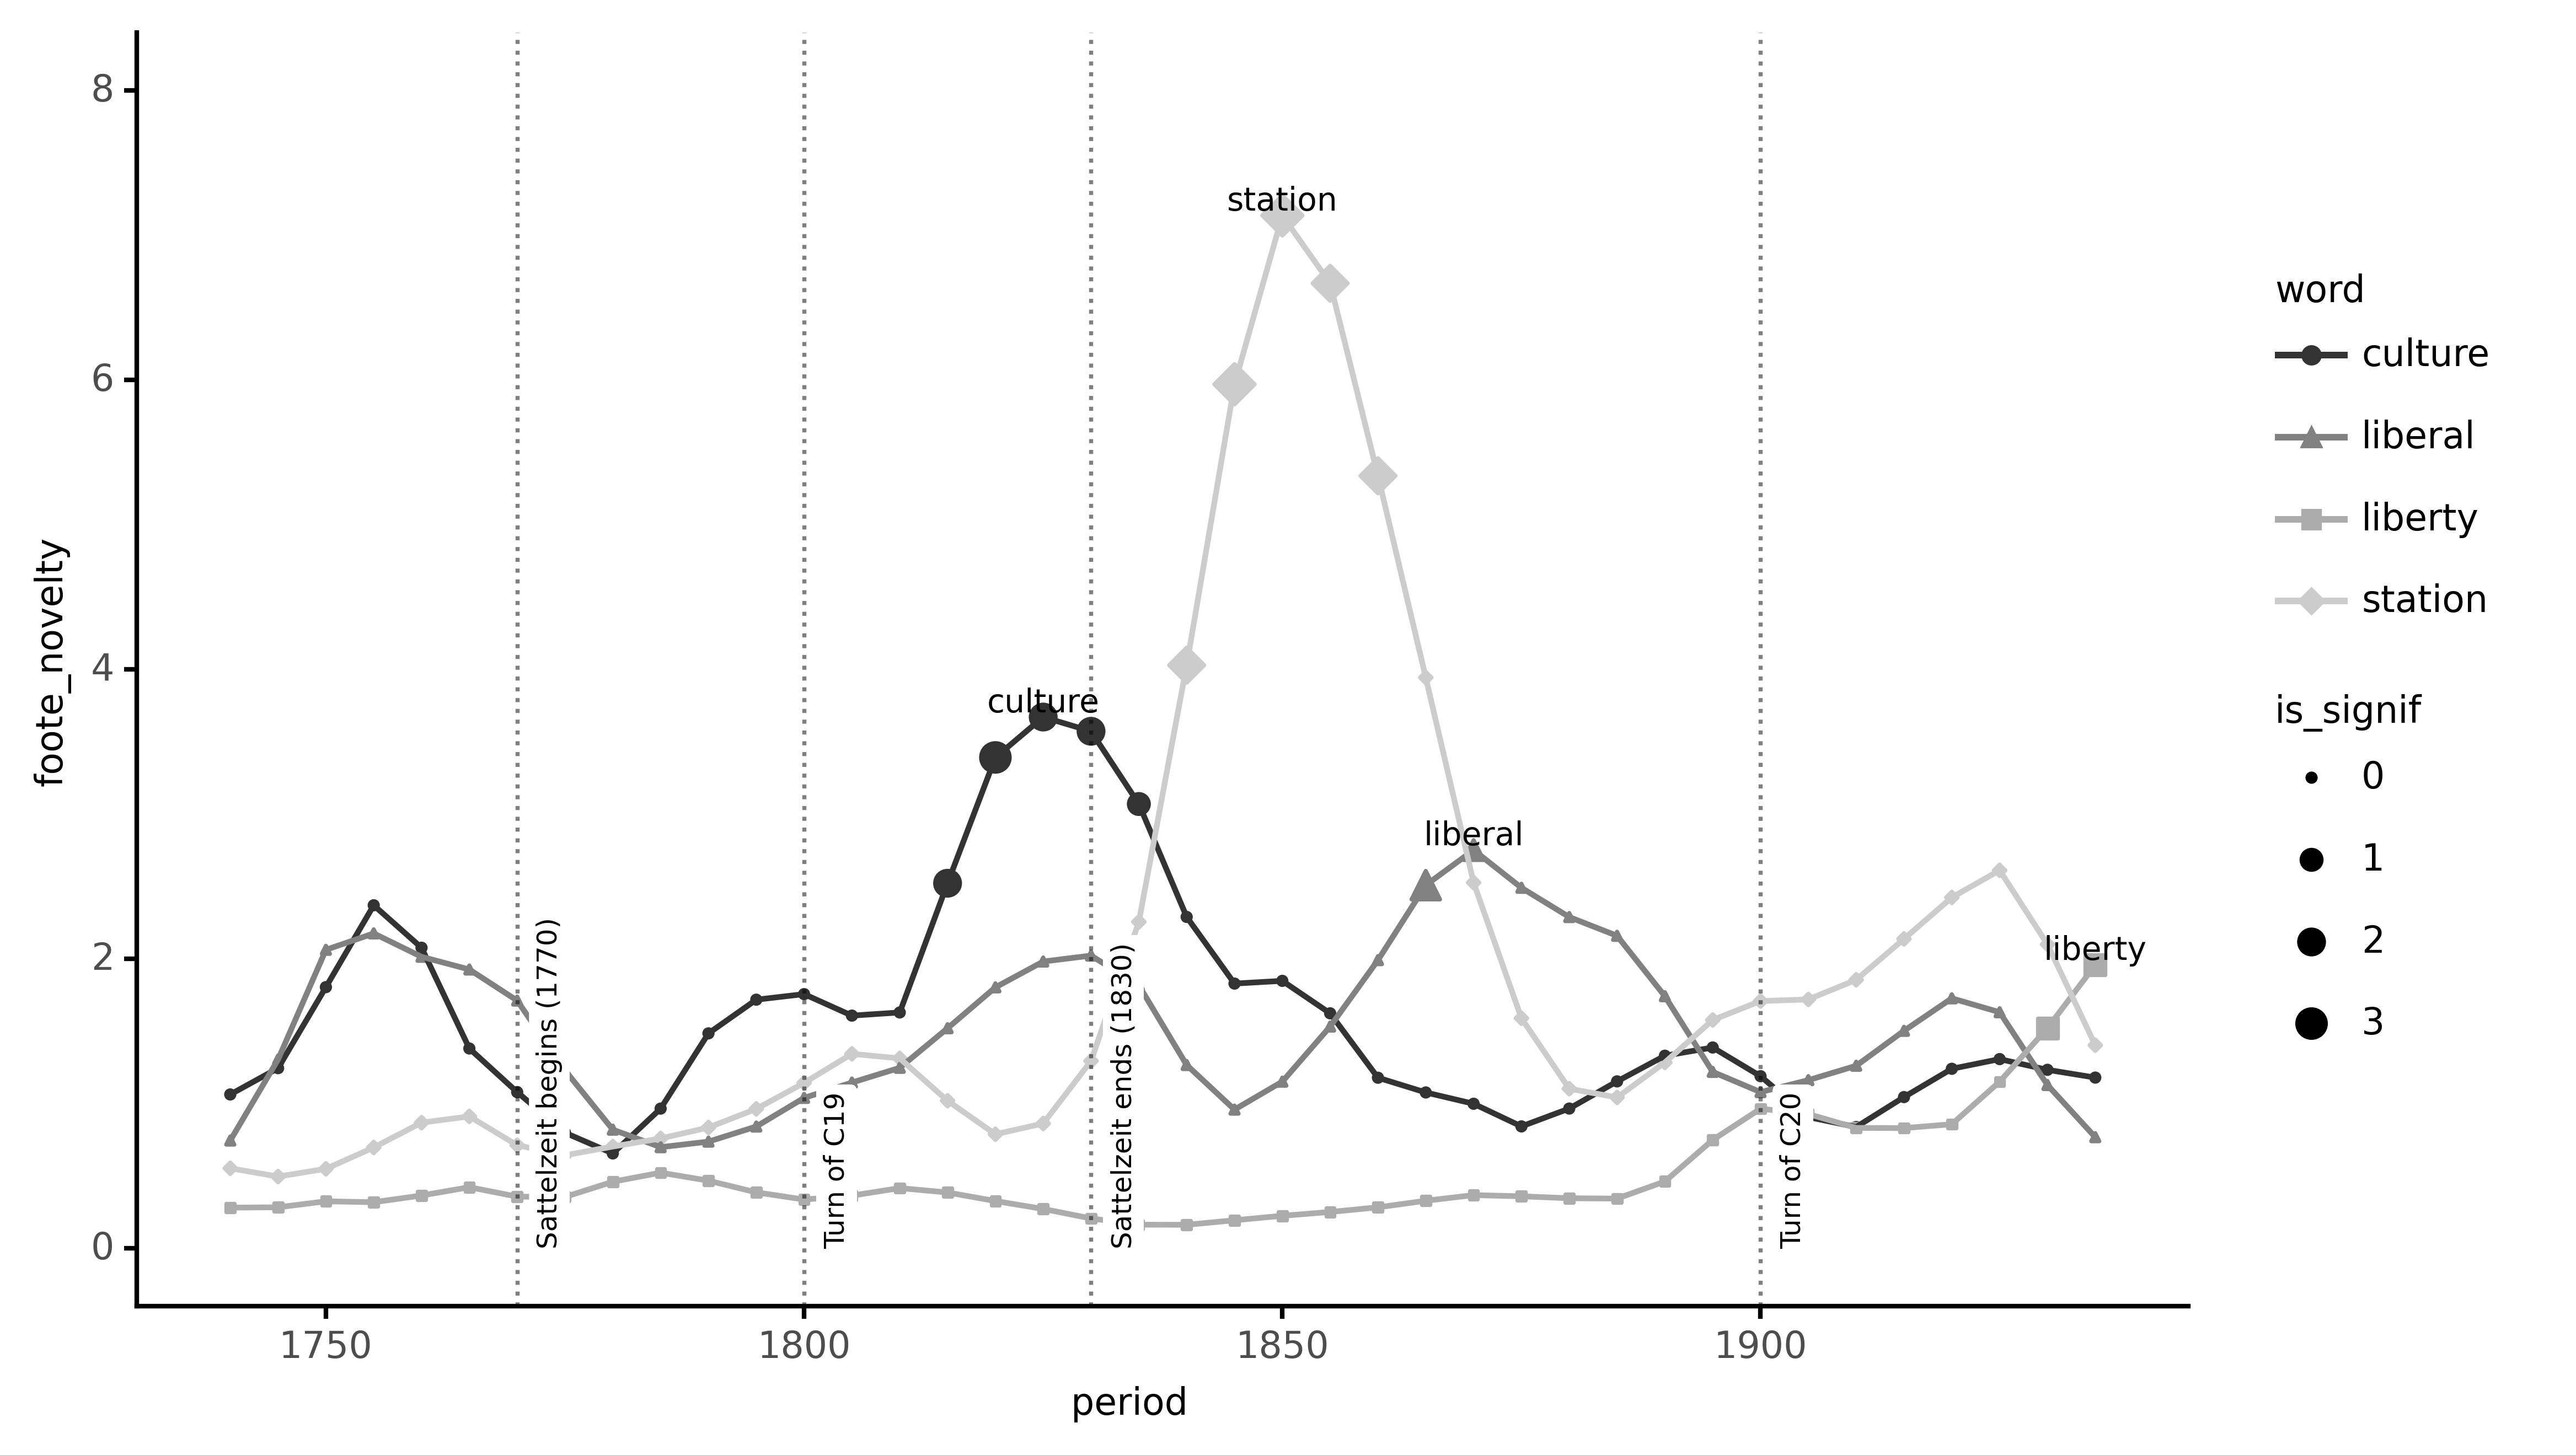

<ggplot: (8788365011505)>

In [27]:
plot_nov_word('station,culture,liberty,liberal')

In [3]:
# def get_eg(word,period1='1760-1780',period2='1860-1880',
#            k=K,corpus=DEFAULT_CORPUS,returndata=True):
#     lnm_key=f'Local neighborhood measure of semantic change (LNM)'
#     if type(word)==list:
#         l=[
#             get_eg(
#                 w,
#                 period1=period1,period2=period2,
#                 k=k,corpus=corpus,returndata=returndata
#             ) for w in word
#         ]
#         l=[x for x in l if x is not None]
#         if returndata:
#             return pd.concat(l).sort_values(lnm_key,ascending=False) if len(l) else pd.DataFrame()
#     #dfnbr = nbr(word)
#     #nbr1 = dfnbr.query(f'period=="{period1}"')
#     #nbr2 = dfnbr.query(f'period=="{period2}"')
#     dfdists = wdist(word)
#     key1=f'{word}_{corpus}_{period1}'
#     key2=f'{word}_{corpus}_{period2}'
#     try:
#         dists1 = dfdists[key1].dropna() * 100
#         dists2 = dfdists[key2].dropna() * 100
#     except KeyError:
#         return pd.DataFrame()
    
#     shared = set(dists1.index) & set(dists2.index)
#     dists1 = dists1.loc[shared].sort_values()
#     dists2 = dists2.loc[shared].sort_values()
    
#     nbr1 = dists1.iloc[:k]
#     nbr2 = dists2.iloc[:k]
#     hl1="**-" if w not in set(nbr2.index) else ""
#     hl2="**+" if w not in set(nbr1.index) else ""
#     nbr1_str = [
#         f'{"<u>-" if w not in set(nbr2.index) else ""}{w}{"</u>" if w not in set(nbr2.index) else ""} ({c:.0f})'
#         for w,c in zip(nbr1.index, nbr1)
#     ]
#     nbr2_str = [
#         f'{"<u>+" if w not in set(nbr1.index) else ""}{w}{"</u>" if w not in set(nbr1.index) else ""} ({c:.0f})'
#         for w,c in zip(nbr2.index, nbr2)
#     ]

    
    
# #     print(mnbr)
#     mnbr = sorted(
#         list(set(nbr1.index) | set(nbr2.index)),
#         key=lambda x: (dists2.loc[x] - dists1.loc[x])
#     )
#     mdist1 = dists1.loc[mnbr]
#     mdist2 = dists2.loc[mnbr]

    
#     mnbr_str = [
# #         f'{w} ({c1:.1f} vs. {c2:.1f})'
#         f'{w} ({(dists2.loc[w]-dists1.loc[w]):+.0f})'
#         for w in mnbr
#     ]
    
#     mdistdist = 1-fastdist.cosine(
#         mdist1.values.astype(float),
#         mdist2.values.astype(float)
#     )
#     if returndata:
#         odf=pd.DataFrame([dict(
#             word=word,
# #             period1=period1,
# #             period2=period2,
#             nbr1=', '.join(nbr1_str),
#             nbr2=', '.join(nbr2_str),
#             mnbr=', '.join(mnbr_str),
#             mnbr_size=len(mnbr),
# #             avg_dist1=round(mdist1.mean(),2),
# #             avg_dist2=round(mdist2.mean(),2),
#             lnm=int(round(mdistdist*100,0))
#         )])
#         odf=round(odf,2)
#         odf.columns = ['Word', f'Neighborhood 1 ({period1})', f'Neighborhood 2 ({period2})',
#                        'Meta Neighborhood',
#                        '# Words in meta neighborhood',
#                        #f'Average distance from meta neighborhood in {period1}', f'Average distance from meta neighborhood in {period2}',
#                        lnm_key]
#         return odf.set_index('Word')
#     else:
#         printm(f'''### {word}
# * Neighborhood 1 ({period1}): {', '.join(nbr1_str)}
# * Neighborhood 2 ({period2}): {', '.join(nbr2_str)}
# * Meta Neighborhood (n={len(mnbr)}): {', '.join(mnbr)}
# * LNM: {mdistdist:.2f}
#     ''')
    
    

In [14]:
def assemble_ldists(
        words=get_valid_words(),
        corp=DEFAULT_CORPUS,
        period1='1700-1770',
        period2='1830-1900',
        incl_words=True,
        k=K,
        n_top=50):
    ldf=ldist_periods(period1,period2,words=words,incl_words=True)
    ldf=ldf.join(get_word2pos_df(),how='inner').reset_index()
    ldf=ldf[~ldf.word.isin(invalid)]
    ldf=ldf[ldf.word.apply(lambda x: len(x)>=4)]
    o=[]
    for pos,posdf in ldf.reset_index().groupby('pos'):
        posdf=posdf.sort_values('dist_perc',ascending=False)
        top=posdf.head(n_top)
        bot=posdf.tail(n_top)
        topstr=', '.join(f'{w}' for w in top.word)
        botstr=', '.join(f'{w}' for w in bot.word)
        for tt,tstr in [('top',topstr), ('bot',botstr)]:
            odx=dict(neighb=tstr, ttype=tt, pos=pos)
            o+=[odx]
    odf=pd.DataFrame(o).pivot('pos','ttype','neighb')
    odf=odf[['top','bot']]
    c1='50 words with the <u>greatest semantic distance</u> from before and after the Sattelzeit (LNM; 1700-1770 vs. 1830-1900)'
    c2=c1.replace('greatest','least')
    odf.columns=[c1,c2]
    odf.index=[POSD.get(x) for x in odf.index]
    return odf

In [5]:
sdf=read_sheet()
invalid=set(sdf[sdf.is_valid.str.startswith('n')].index)

In [15]:
df_to_png(
    assemble_ldists(n_top=1000),
    os.path.join(PATH_FIGS2,'fig.tbl.100words.png')
)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x01\xd7\x08\x06\x00\x00\x00"\x1e(\xb…

'/home/ryan/Markdown/Drafts/TheGreatAbstraction/figures/fig.tbl.100words.png'

In [19]:
def get_eg(words,period1='1700-1770',period2='1830-1900',
           k=K,corpus=DEFAULT_CORPUS,returndata=True):
    lnm_key=f'Local neighborhood measure of semantic change (LNM)'
    dists=ldist_periods(period1,period2,incl_words=True)#.loc[words].sort_values(
#         'dist',ascending=False
#     )
    return dists
    hl1="**-" if w not in set(nbr2.index) else ""
    hl2="**+" if w not in set(nbr1.index) else ""
    nbr1_str = [
        f'{"<u>-" if w not in set(nbr2.index) else ""}{w}{"</u>" if w not in set(nbr2.index) else ""} ({c:.0f})'
        for w,c in zip(nbr1.index, nbr1)
    ]
    nbr2_str = [
        f'{"<u>+" if w not in set(nbr1.index) else ""}{w}{"</u>" if w not in set(nbr1.index) else ""} ({c:.0f})'
        for w,c in zip(nbr2.index, nbr2)
    ]

    
    
#     print(mnbr)
    mnbr = sorted(
        list(set(nbr1.index) | set(nbr2.index)),
        key=lambda x: (dists2.loc[x] - dists1.loc[x])
    )
    mdist1 = dists1.loc[mnbr]
    mdist2 = dists2.loc[mnbr]

    
    mnbr_str = [
#         f'{w} ({c1:.1f} vs. {c2:.1f})'
        f'{w} ({(dists2.loc[w]-dists1.loc[w]):+.0f})'
        for w in mnbr
    ]
    
    mdistdist = 1-fastdist.cosine(
        mdist1.values.astype(float),
        mdist2.values.astype(float)
    )
    if returndata:
        odf=pd.DataFrame([dict(
            word=word,
#             period1=period1,
#             period2=period2,
            nbr1=', '.join(nbr1_str),
            nbr2=', '.join(nbr2_str),
            mnbr=', '.join(mnbr_str),
            mnbr_size=len(mnbr),
#             avg_dist1=round(mdist1.mean(),2),
#             avg_dist2=round(mdist2.mean(),2),
            lnm=int(round(mdistdist*100,0))
        )])
        odf=round(odf,2)
        odf.columns = ['Word', f'Neighborhood 1 ({period1})', f'Neighborhood 2 ({period2})',
                       'Meta Neighborhood',
                       '# Words in meta neighborhood',
                       #f'Average distance from meta neighborhood in {period1}', f'Average distance from meta neighborhood in {period2}',
                       lnm_key]
        return odf.set_index('Word')
    else:
        printm(f'''### {word}
* Neighborhood 1 ({period1}): {', '.join(nbr1_str)}
* Neighborhood 2 ({period2}): {', '.join(nbr2_str)}
* Meta Neighborhood (n={len(mnbr)}): {', '.join(mnbr)}
* LNM: {mdistdist:.2f}
    ''')
    
    

In [20]:
get_eg('value')

dist  mneighb_size  neighb1_size  \
word       period1   period2                                           
hock       1700-1770 1830-1900  0.231764            19            10   
surmounted 1700-1770 1830-1900  0.172093            19            10   
capes      1700-1770 1830-1900  0.168549            19            10   
azure      1700-1770 1830-1900  0.147573            15            10   
embodied   1700-1770 1830-1900  0.141349            19            10   
...                                  ...           ...           ...   
company    1700-1770 1830-1900  0.019338            16            10   
subjected  1700-1770 1830-1900  0.015253            16            10   
dispersed  1700-1770 1830-1900  0.015086            17            10   
conquer    1700-1770 1830-1900  0.013958            15            10   
defeated   1700-1770 1830-1900  0.013098            14            10   

                                neighb2_size  \
word       period1   period2                   
hock       1700-1770 1830-1900            10   
surmounted 1700-1770 1830-1900            10   
capes      1700-1770 1830-1900            10   
azure      1700-1770 1830-1900            10   
embodied   1700-1770 1830-1900            10   
...                                      ...   
company    1700-1770 1830-1900            10   
subjected  1700-1770 1830-1900            10   
dispersed  1700-1770 1830-1900            10   
conquer    1700-1770 1830-1900            10   
defeated   1700-1770 1830-1900            10   

                                                                                                                                                       neighb1  \
word       period1   period2                                                                                                                                     
hock       1700-1770 1830-1900                                hock, -shock, -explosion, -hurricane, -inundation, -shocks, -storm, -flash, -violent, -commotion   
surmounted 1700-1770 1830-1900  surmounted, -encountered, -overcome, -invincible, -dissipated, -perseverance, -endured, -overwhelmed, -difficulties, -overcame   
capes      1700-1770 1830-1900                                          capes, -lizard, -pink, -schooner, -greyhound, -mermaid, -galley, -bay, -shields, -loop   
azure      1700-1770 1830-1900                                                     azure, plumes, -beams, snowy, -radiance, -vivid, purple, dusky, -gild, -sky   
embodied   1700-1770 1830-1900                  embodied, -militia, -regiments, -aggregate, -invalids, -marines, -battalion, -trained, -companies, -volunteers   
...                                                                                                                                                        ...   
company    1700-1770 1830-1900                         company, directors, companies, -proprietors, dividend, -managers, -stock, -merchants, -bonds, -trustees   
subjected  1700-1770 1830-1900                        subjected, liable, -abolished, -excluded, ascribed, submitted, -allowed, -compelled, -taxed, -restrained   
dispersed  1700-1770 1830-1900                         dispersed, disperse, routed, -burned, -repulsed, -circulated, -defeated, -villages, -broken, -abandoned   
conquer    1700-1770 1830-1900                                      conquer, resist, regain, -defend, abandon, crush, -yield, -invading, -protect, -victorious   
defeated   1700-1770 1830-1900                         defeated, routed, defeat, besieged, repulsed, -abandoned, -rallied, -conquered, -reinforced, victorious   

                                                                                                                                              neighb2  \
word       period1   period2                                                                                                                            
hock       1700-1770 1830-1900                               

In [6]:
def get_keywords_williams():
    dfkw=get_keywords_df()
    odf=dfkw[dfkw.in_author.str.contains('Williams')]
    return set(odf.index)

In [14]:
kw=list(get_keywords_williams())
# kw

In [15]:
# dfeg=get_eg(kw)
# dfeg

In [16]:
# words=[
#     'culture','liberal','liberty','growth',
#     #'sensibility',
#     'bubble',
#     #'improvement',
#     'irritation'
# ]#,'commercial']#,'station']

In [17]:
words=['station','culture','liberty','liberal']

In [18]:
# do_ldist??

In [19]:
# dfeg=get_eg(words)
# printm(dfeg)

In [20]:

# ofnfn=os.path.join(PATH_FIGS2,'fig.3eg.v233.png')
# df_to_png(get_eg(words), ofnfn)

In [21]:
# ofnfn=os.path.join(PATH_FIGS2,'fig.3eg.v3.png')
# df_to_png(
#     get_eg(words,period1='1700-1770',period2='1830-1900'),
#     ofnfn
# )

In [53]:
## Percentiles?

In [57]:
df=read_sheet()

In [71]:
invalid=set(df[df.is_valid.str.startswith('n')].index) | {'fun','tact'}
# invalid

In [77]:
ldf=assemble_ldists()
printm(ldf)

|              | 50 words with the <u>greatest semantic distance</u> from before and after the Sattelzeit (LNM; 1700-1770 vs. 1830-1900)                                                                                                                                                                                                                                                                                                                                                      | 50 words with the <u>least semantic distance</u> from before and after the Sattelzeit (LNM; 1700-1770 vs. 1830-1900)                                                                                                                                                                                                                                                                                                                                                                       |
|:-------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Adj.         | lucid, prima, pink, radical, dense, veiled, tartan, attractive, electoral, vertical, annoyed, cordial, angular, condensed, legislative, mini, humbler, contrasting, annoying, fluent, meagre, thoughtful, tiny, civilian, perpendicular, intelligent, dusky, anxious, akin, indignant, glossy, metallic, unavailing, baneful, premier, tardy, concave, bilious, tuneful, central, propitious, snowy, topical, bony, crisp, nude, rocky, numb, liquid, sensitive              | common, natural, cheaper, young, strong, capable, pious, inferior, righteous, consecrated, daily, shifting, hourly, discontented, legal, severest, bloody, richer, offending, holy, everlasting, roman, reasonable, explicit, habitable, vice, unfinished, opposite, boldest, ungrateful, ripe, ungenerous, alive, highest, spare, temporary, tacit, profane, shorter, high, fellow, liable, weakest, dead, rich, alternative, wiser, heavier, easier, divine                              |
| Noun (sing.) | omnibus, studio, deficit, vita, loop, sheen, forte, haze, hock, horizon, curve, layer, nave, opus, foil, greyhound, bouquet, gloom, terra, hymn, stew, disc, concert, accommodation, tint, drawback, brig, reef, relic, blackness, employer, rail, gleam, zinc, squirrel, chalk, lecturer, chord, cornet, punt, veto, glen, stool, velvet, glade, pepper, wail, transportation, data, recital                                                                                | reading, conceit, impossibility, lament, complaint, fortune, image, herb, view, pique, hindrance, mecca, adulation, deed, drought, guilt, spring, pulpit, sword, commandment, righteousness, oration, liberty, custom, port, breach, midnight, venture, benefit, saint, pope, inheritance, providence, temerity, oblivion, burial, evil, confirmation, judgement, dowager, order, guard, exhaust, claim, fortnight, conscience, quarter, reason, justice, probability                      |
| Noun (plur.) | fillies, invalids, drawbacks, coils, tenders, magazines, mils, ferns, ruffians, trains, rays, weaknesses, performances, reptiles, firms, sculptures, deficiencies, civilians, forts, capes, vans, humours, vines, colts, breakers, genera, designs, tubes, extras, manufacturers, colds, companies, billows, anthems, acids, examinations, streams, imitations, merchants, adults, themes, concerts, linens, stems, plantations, patches, edges, coughs, attractions, onions | battles, commissions, hops, counts, answers, readings, exhortations, translators, dukes, liquors, talks, friendships, husbands, kingdoms, empires, distresses, pastures, leaves, burdens, seas, sages, wigs, impressions, generations, miracles, events, imaginations, mondays, saints, twins, gains, intents, commentators, majesties, bills, offerings, truths, convents, meanings, torments, idioms, commandments, chickens, ages, rights, indulgences, martyrs, spoils, seeds, terrors |
| Verb         | strode, sank, sinking, burns, embraces, glows, frowning, surmounted, lifts, reveals, relax, gleams, await, guarantee, slips, deplore, detach, fathom, blushing, expanded, dilated, shakes, gazing, wailing, proclaims, echoing, hurried, stealing, disclose, echoes, stirred, sped, revel, failed, sewed, sighs, utters, laugh, confided, reviewed, waving, teems, picking, retorted, looked, ailed, launched, pries, yell, grasp                                            | establish, depends, produce, vanishes, suspected, pave, avoided, prescribe, resides, lived, prosecuting, mistaken, charged, plied, deserve, convert, mistook, treat, handed, marries, follow, submit, turn, evade, derives, speaks, filled, explain, soaked, renders, withhold, paid, intercepted, carries, avoid, meets, plead, arising, hatched, commanded, falls, taxed, exceed, departed, lies, avow, discover, torn, neglecting, passes                                               |

[Koselleck] (07:43:18) Number of unique neighbors: 28 (+83.8s)


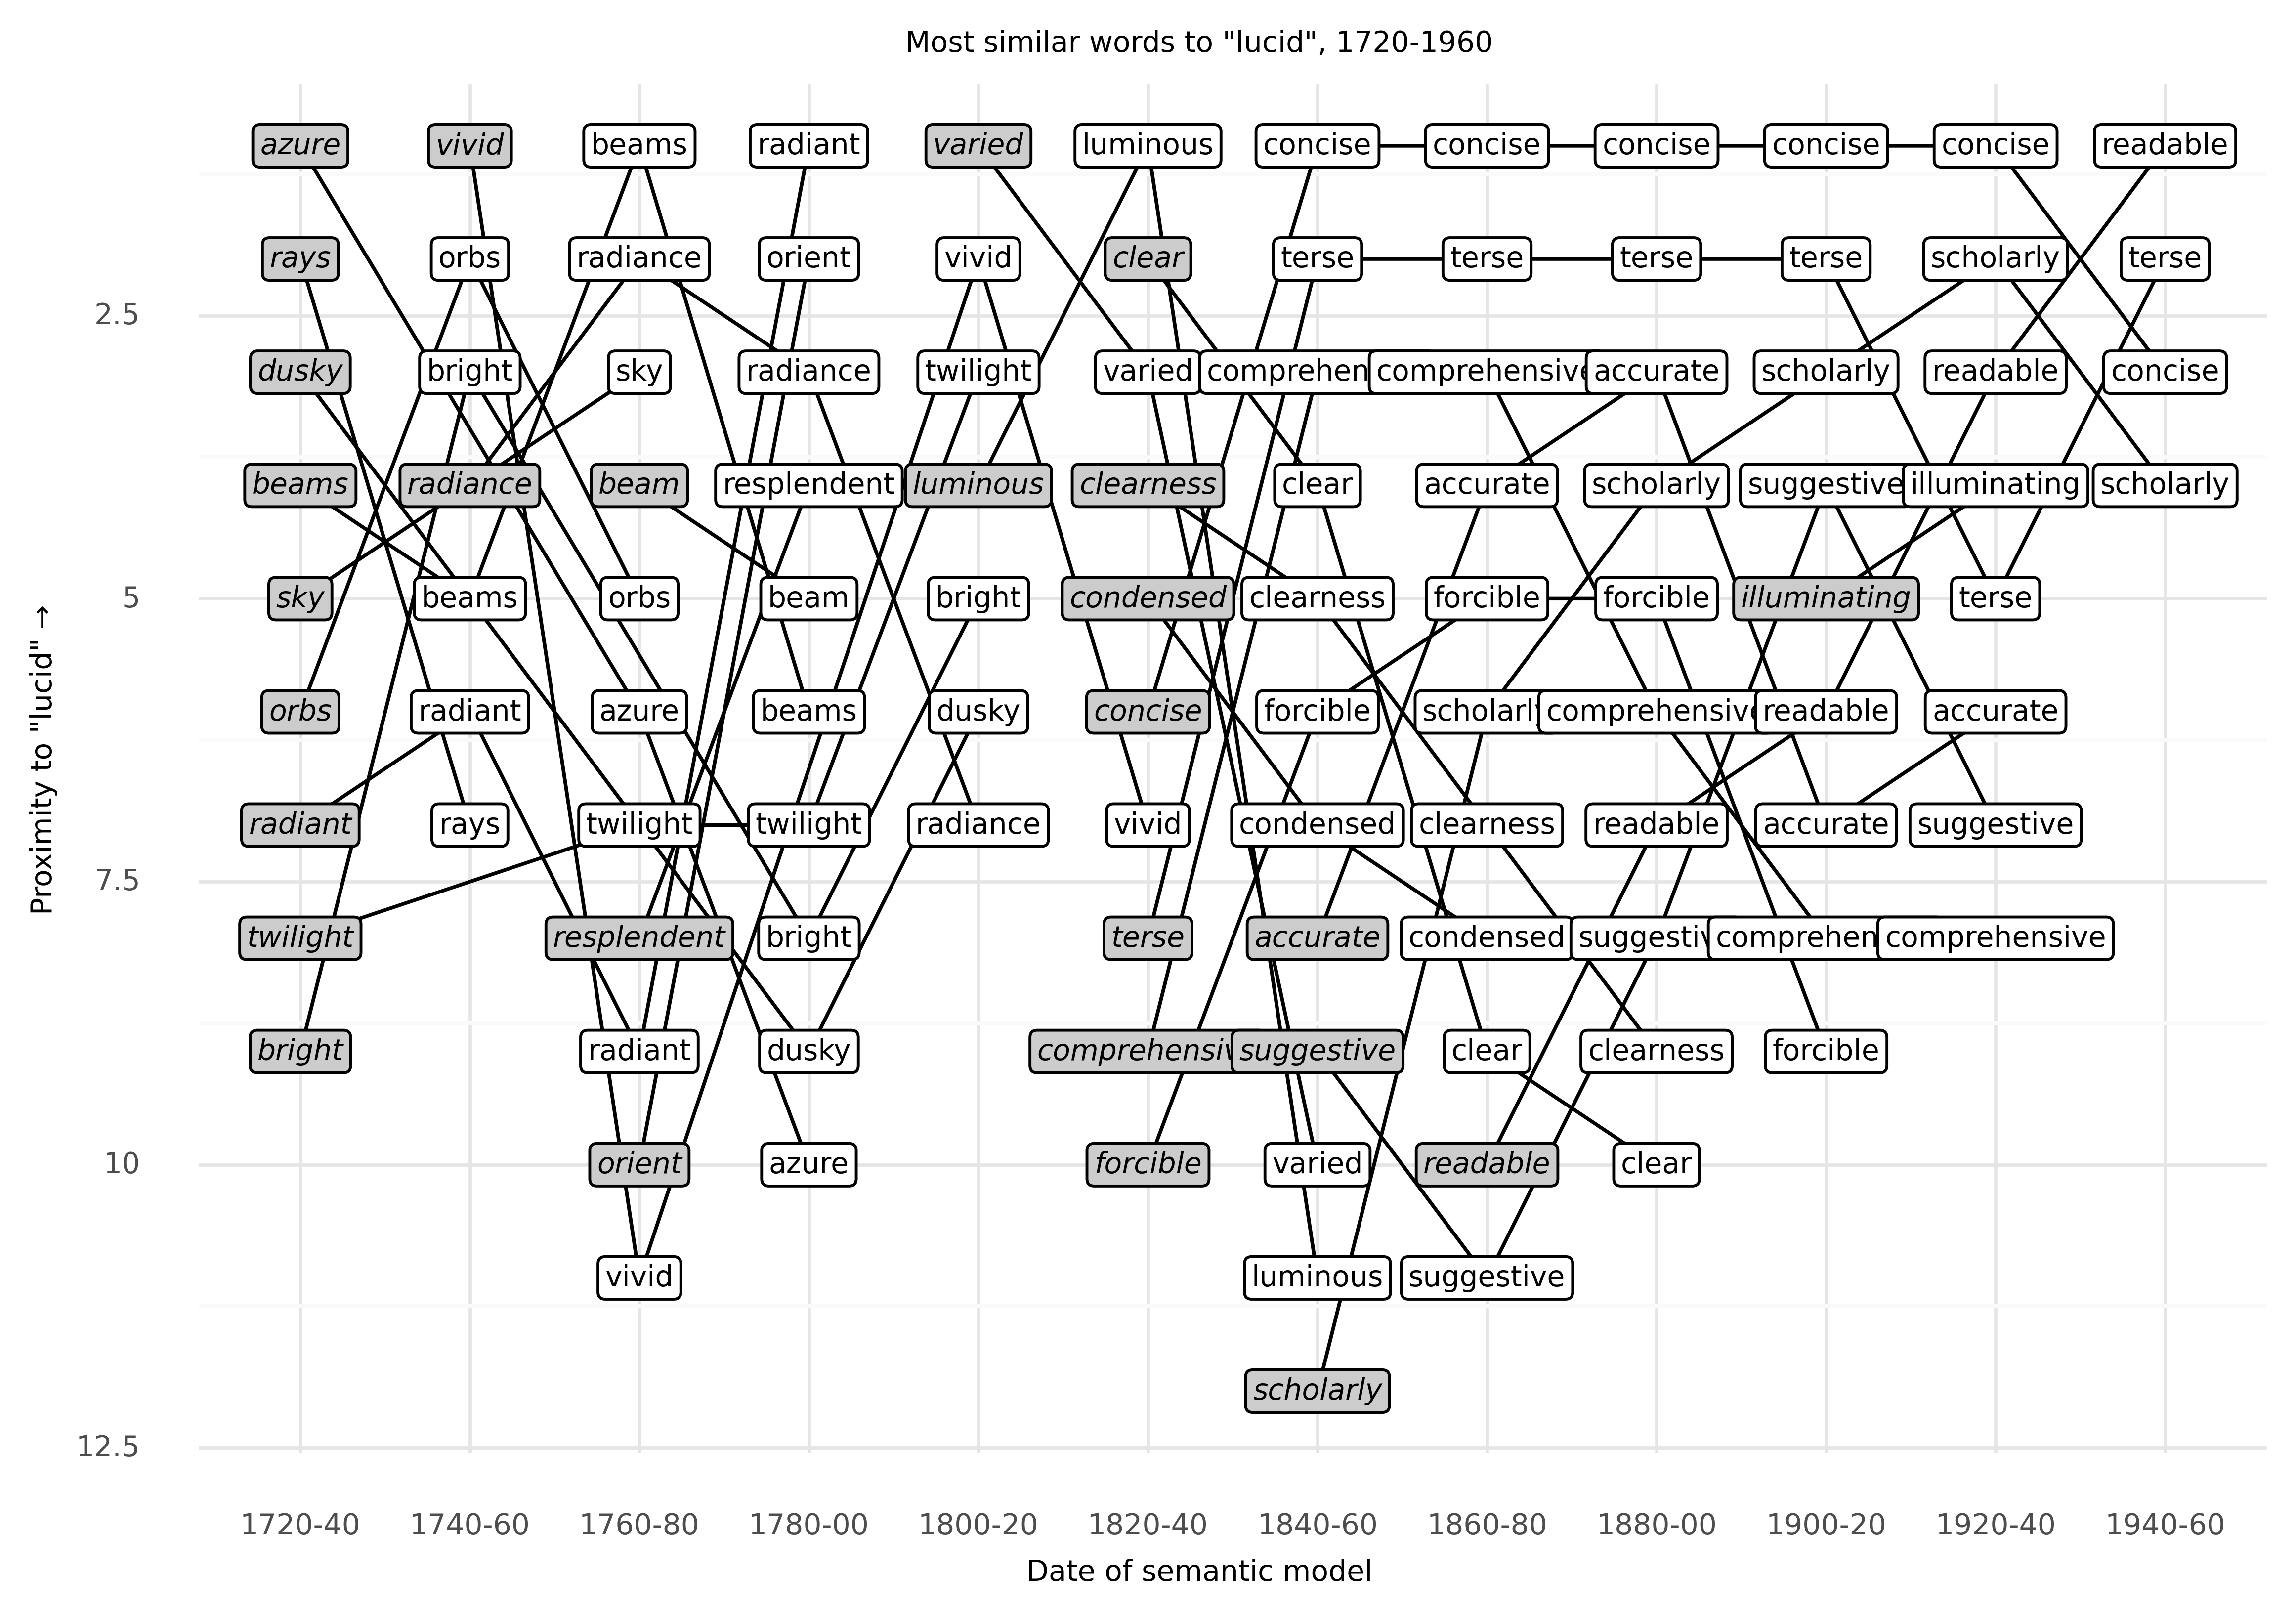

<ggplot: (8732273106143)>

In [78]:
plot_nbrs('lucid')

In [80]:
words2=to_words("""
lucid
radical
omnibus
horizon
""")



ofnfn=os.path.join(PATH_FIGS2,'fig.6eg.png')
df_to_png(get_eg(words2), ofnfn)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x03]\x08\x06\x00\x00\x00\n\xaa\x0e$\…

'/home/ryan/Markdown/Drafts/TheGreatAbstraction/figures/fig.6eg.png'